# **1번째 과제 : 경향신문 크롤링**
* 하단의 코드들은 돌리는데 엄청난 시간이 걸리고, 이미 결과물을 낸 상태라 따로 설명을 첨부하지 않았습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

In [ ]:
!apt-get update &> /dev/null
!apt install chromium-chromedriver &> /dev/null
!cp /usr/lib/chromium-browser/chromedriver /usr/bin &> /dev/null
!pip install selenium &> /dev/null

from bs4 import BeautifulSoup
import requests
import urllib.request
from selenium import webdriver
import pandas as pd
import re
import time
import pickle

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [ ]:
url_list = []
title_list = []
year_list = []
month_list = []
day_list = []
content_list = []
news_list = []

keyword = '저소득층'
start_date = '20110101'
end_date = '20201231'

In [ ]:
def get_infos(num):
    total_pages = int(num / 10) + 1

    driver = webdriver.Chrome('chromedriver', options=options)

    for i in range(1, total_pages + 1):
        url = 'http://search.khan.co.kr/search.html?stb=khan&dm=5&q={}&pg={}&sort=1&d1={}~{}'.format(keyword, i, start_date, end_date)
        driver.get(url)
        driver.maximize_window()

        try:
            for j in range(1, 10 + 1):
                title_url_xpath = driver.find_element_by_xpath('//*[@id="container"]/div[2]/div[2]/dl[{}]/dt/a'.format(j))
                date_xpath = driver.find_element_by_xpath('//*[@id="container"]/div[2]/div[2]/dl[{}]/dt/span'.format(j))

                title_list.append(title_url_xpath.text)
                url_list.append(title_url_xpath.get_attribute('href'))
                year_list.append(int(date_xpath.text[1:5]))
                month_list.append(int(date_xpath.text[7:9]))
                day_list.append(int(date_xpath.text[11:13]))
        
        except:
            break

    driver.close()


In [ ]:
def get_content(url_list, pickle_url):
    driver = webdriver.Chrome('chromedriver', options=options)

    crawling_counter = 1

    for url in url_list:
        try:
            driver.get(url)
            driver.maximize_window()
            time.sleep(2)

            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')

            tmp = soup.find('div', class_ = 'art_body')
            tmp2 = tmp.find_all('p', 'content_text')

            content = ''
            for i in tmp2:
                content += i.text
        
            pickle_url.append(content)
        
        except:
            pickle_url.append(' ')

        if crawling_counter % 100 == 0:
            print('{} out of {} content crawling done...'.format(crawling_counter, len(url_list)))

        crawling_counter += 1

    driver.close()


In [ ]:
def content_num(url):
    driver = webdriver.Chrome('chromedriver', options=options)
    driver.get(url)
    driver.maximize_window()

    num = driver.find_element_by_xpath('//*[@id="container"]/div[2]/div[2]/h3/span')
    
    return int(re.findall('\d+', num.text.replace(',', ''))[0])


In [ ]:
start = time.time()

init_url = 'http://search.khan.co.kr/search.html?stb=khan&dm=5&q={}&pg=1&sort=1&d1={}~{}'.format(keyword, start_date, end_date)

print('Get Number of Contents...')
num_content = content_num(init_url)
print('Total number of contents : {}'.format(num_content))
print()

print('Get Title, URL, Date...')
get_infos(num_content)
print('Title, URL, Date Crawling Done.')
print()

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_data.pickle', 'wb') as f:
    pickle.dump(url_list, f)
    pickle.dump(title_list, f)
    pickle.dump(year_list, f)
    pickle.dump(month_list, f)
    pickle.dump(day_list, f)

print('Total spend time : {} seconds'.format(time.time() - start))


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_data.pickle', 'rb') as f:
    url_list = pickle.load(f)
    title_list = pickle.load(f)
    year_list = pickle.load(f)
    month_list = pickle.load(f)
    day_list = pickle.load(f)

In [ ]:
start = time.time()

content_1_500 = []

print('Get Content number 1 to 500...')
get_content(url_list[:500], content_1_500)
print('Content number 1 to 500 Crawling Done.')

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_1_500.pickle', 'wb') as f:
    pickle.dump(content_1_500, f)

print('Total spend time : {} seconds'.format(time.time() - start))

In [ ]:
start = time.time()

content_501_1000 = []

print('Get Content number 501 to 1000...')
get_content(url_list[500:1000], content_501_1000)
print('Content number 501 to 1000 Crawling Done.')

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_501_1000.pickle', 'wb') as f:
    pickle.dump(content_501_1000, f)

print('Total spend time : {} seconds'.format(time.time() - start))

In [ ]:
start = time.time()

content_1001_1500 = []

print('Get Content number 1001 to 1500...')
get_content(url_list[1000:1500], content_1001_1500)
print('Content number 1001 to 1500 Crawling Done.')

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_1001_1500.pickle', 'wb') as f:
    pickle.dump(content_1001_1500, f)

print('Total spend time : {} seconds'.format(time.time() - start))

In [ ]:
start = time.time()

content_1501_2500 = []

print('Get Content number 1501 to 2500...')
get_content(url_list[1500:2500], content_1501_2500)
print('Content number 1501 to 2500 Crawling Done.')

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_1501_2500.pickle', 'wb') as f:
    pickle.dump(content_1501_2500, f)

print('Total spend time : {} seconds'.format(time.time() - start))

In [ ]:
start = time.time()

content_2501_3500 = []

print('Get Content number 2501 to 3500...')
get_content(url_list[2500:3500], content_2501_3500)
print('Content number 2501 to 3500 Crawling Done.')

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_2501_3500.pickle', 'wb') as f:
    pickle.dump(content_2501_3500, f)

print('Total spend time : {} seconds'.format(time.time() - start))

In [ ]:
start = time.time()

content_3501_4500 = []

print('Get Content number 3501 to 4500...')
get_content(url_list[3500:4500], content_3501_4500)
print('Content number 3501 to 4500 Crawling Done.')

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_3501_4500.pickle', 'wb') as f:
    pickle.dump(content_3501_4500, f)

print('Total spend time : {} seconds'.format(time.time() - start))

In [ ]:
start = time.time()

content_4501_end = []

print('Get Content number 4501 to end...')
get_content(url_list[4500:], content_4501_end)
print('Content number 4501 to end Crawling Done.')

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_4501_end.pickle', 'wb') as f:
    pickle.dump(content_4501_end, f)

print('Total spend time : {} seconds'.format(time.time() - start))

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_1_500.pickle', 'rb') as f:
    tmp = pickle.load(f)
content_list += tmp

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_501_1000.pickle', 'rb') as f:
    tmp = pickle.load(f)
content_list += tmp

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_1001_1500.pickle', 'rb') as f:
    tmp = pickle.load(f)
content_list += tmp

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_1501_2500.pickle', 'rb') as f:
    tmp = pickle.load(f)
content_list += tmp

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_2501_3500.pickle', 'rb') as f:
    tmp = pickle.load(f)
content_list += tmp

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_3501_4500.pickle', 'rb') as f:
    tmp = pickle.load(f)
content_list += tmp

with open('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/khan_content_4501_end.pickle', 'rb') as f:
    tmp = pickle.load(f)
content_list += tmp

In [ ]:
news_list = ['경향'] * len(title_list)

In [ ]:
total = pd.DataFrame({'title' : title_list, 'news' : news_list, 'year' : year_list, 'month' : month_list, 'day' : day_list, 'url' : url_list, 'content' : content_list})

In [ ]:
unused = []

for i in range(len(total['content'])):
    if total['content'][i] == ' ':
        unused.append(i)

total = total.drop(index = unused, axis = 0)
total = total.dropna(axis = 0)
total = total.reset_index(drop = True)
total

In [ ]:
total['content'] = total['content'].str.replace(r'[^a-zA-Z0-9\s가-힣]', ' ')
total['content'] = total['content'].str.replace(r'[ ]{2,}', ' ')
total['content'] = total['content'].str.strip()

total['content'][:5]

In [ ]:
total['title'] = total['title'].str.replace(r'[^a-zA-Z0-9\s가-힣]', ' ')
total['title'] = total['title'].str.replace(r'[ ]{2,}', ' ')
total['title'] = total['title'].str.strip()

total['title'][:5]

In [ ]:
total.head(10)

In [ ]:
total.to_csv('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/저소득층_경향.csv', encoding="utf-8-sig")

# **2번째 과제 : 중앙일보 크롤링**
* 경향신문 크롤링 과제와 마찬가지로 이미 크롤링된 파일을 추출해 낸 상태이므로, 따로 실행하지 않았고 LDA 분석에 경향, 중앙 두 파일을 사용하였습니다.

In [ ]:
url_list = []
title_list = []
year_list = []
month_list = []
day_list = []
content_list = []
news_list = []

In [ ]:
page_num = 1

url = 'https://news.joins.com/Search/TotalNews?page={}&Keyword=%EC%A0%80%EC%86%8C%EB%93%9D%EC%B8%B5&PeriodType=DirectInput&StartSearchDate=01%2F01%2F2011%2000%3A00%3A00&EndSearchDate=12%2F31%2F2020%2000%3A00%3A00&SortType=New&SourceGroupType=Joongang&SearchCategoryType=TotalNews'.format(page_num)

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')

total_page_loc = soup.find('span', class_ = 'total_number')
total_page = int(total_page_loc.text[2:total_page_loc.text.find('/')])
total_page

In [ ]:
def get_title_date_url(page):
    url = 'https://news.joins.com/Search/TotalNews?page={}&Keyword=%EC%A0%80%EC%86%8C%EB%93%9D%EC%B8%B5&PeriodType=DirectInput&StartSearchDate=01%2F01%2F2011%2000%3A00%3A00&EndSearchDate=12%2F31%2F2020%2000%3A00%3A00&SortType=New&SourceGroupType=Joongang&SearchCategoryType=TotalNews'.format(page)
    
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    a = soup.find_all('h2', class_ = 'headline mg')
    for i in a:
        url_list.append(i.find('a')['href'])
        title_list.append(i.find('a').text)
    
    b = soup.find_all('span', class_ = 'byline')
    for i in b:
        tmp_date = i.get_text()
        aa = tmp_date.find('.')
        year_list.append(int(tmp_date[aa - 4:aa]))
        month_list.append(int(tmp_date[aa + 1:aa + 3]))
        day_list.append(int(tmp_date[aa + 4:aa + 6]))


In [ ]:
for i in range(total_page):
    get_title_date_url(i)

In [ ]:
news_list = ['중앙'] * len(title_list)

In [ ]:
total = pd.DataFrame({'title' : title_list, 'news' : news_list, 'year' : year_list, 'month' : month_list, 'day' : day_list, 'url' : url_list})
total

In [ ]:
def get_content(url):
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    try:
        aaa = soup.select_one('div.article_body')
    
        try:
            aaa.p.decompose()
        except:
            pass
        try:
            aaa.img.decompose()
        except:
            pass
        try:
            aaa.span.decompose()
        except:
            pass
        content_list.append(aaa.text)
    except:
        print(url)
        content_list.append(' ')
    

In [ ]:
for i in total['url']:
    get_content(i)

In [ ]:
total['content'] = content_list
total

In [ ]:
total['content'] = total['content'].str.replace(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)" , '')
total

In [ ]:
total['content'] = total['content'].str.replace('[', '')
total['content'] = total['content'].str.replace(']', '')
total['content'] = total['content'].str.replace("'", "")  
total['content'] = total['content'].str.replace('"', '')
total['content'] = total['content'].str.replace(',', '')
total['content'] = total['content'].str.replace(r'\\n', '') 
total['content'] = total['content'].str.replace(r'\\r', '')
total['content'] = total['content'].str.replace(r'\\xa0', '')
total['content'] = total['content'].str.replace('‘', '')
total['content'] = total['content'].str.replace('’', '')
total['content'] = total['content'].str.replace('“', '')
total['content'] = total['content'].str.replace('”', '')
total['content'] = total['content'].str.replace('.', '')
total['content'] = total['content'].str.replace('//', '')
total['content'] = total['content'].str.replace('ㆍ', '')
total['content'] = total['content'].str.replace('  ', '')
total['content'] = total['content'].str.replace('·', '')
total['content'] = total['content'].str.replace('…', '')
total['content'] = total['content'].str.replace('〈br〉', '')
total['content'] = total['content'].str.replace('「', '')
total['content'] = total['content'].str.replace('」', '')
total['content'] = total['content'].str.replace(r'\\', '')
total['content'] = total['content'].str.replace('아티클 공통 : DA 250', '') 
total['content'] = total['content'].str.replace('아티클 공통 : 관련기사', '')
total['content'] = total['content'].str.strip()

In [ ]:
total['content'] = total['content'].str.replace(r'[^a-zA-Z0-9\s가-힣]', ' ')
total['content'] = total['content'].str.replace(r'[ ]{2,}', ' ')
total['content'] = total['content'].str.strip()

In [ ]:
for i in range(len(total['content'])):
    gija_loc = total['content'][i].rfind('기자')
    if len(total['content'][i]) - gija_loc < 20:
        total['content'][i] = total['content'][i][:gija_loc - 4]

In [ ]:
total['content'] = total['content'].str.strip()
total

In [ ]:
total.to_csv('저소득층_중앙.csv', encoding="utf-8-sig")

In [ ]:
one = pd.read_csv('저소득층_경향.csv')
two = pd.read_csv('저소득층_중앙.csv')

In [ ]:
real_total = pd.concat([one, two])
real_total

In [ ]:
real_total = real_total.drop([real_total.columns[0]], axis = 1)
real_total = real_total.reset_index()
real_total = real_total.drop([real_total.columns[0]], axis = 1)

In [ ]:
real_total.to_csv('저소득층_경향_중앙.csv', encoding="utf-8-sig")

# **3번째 과제 : LDA 토픽 모델링 실행**
* 이전 과제에 제출한 부분과 미세한 차이가 있습니다. 그러한 부분에 대한 설명을 추가하였고, 이전 과제와 설명 부분에서는 거의 유사합니다.

## **0. 마운트 및 라이브러리 가져오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
!pip install tomotopy &> /dev/null
!pip install pyldavis==2.1.2 &> /dev/null
!pip install konlpy &> /dev/null

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git &> /dev/null
!bash Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab190912.sh &> /dev/null

In [ ]:
!apt -qq -y install fonts-nanum &> /dev/null

### 0-0. 한글 파일 깨지기 않게 하기 위한 코드
* 반드시 밑의 파일을 실행하고, 런타임 다시 시작을 누른 후, 밑의 모듈 import부터 코드를 실행해 주세요

In [ ]:
!sudo apt-get install -y fonts-nanum &> /dev/null
!sudo fc-cache -fv &> /dev/null
!rm ~/.cache/matplotlib -rf &> /dev/null

In [ ]:
import pandas as pd
import numpy as np

import tomotopy as tp
import pyLDAvis
import pprint

import collections
import gensim
from konlpy.tag import Mecab 
from konlpy.corpus import kolaw
from multiprocessing import Pool

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import matplotlib.colors as clr

import pickle

%config InlineBckend.figure_format = 'retina'

plt.rc('font', family = 'NanumBarunGothic')

%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


## **1. 크롤링 파일 전처리 및 신문사별로 나누기**
* 기존에 크롤링했던 파일 중, 값이 들어가 있지 않거나 추가로 전처리해야 하는 부분을 찾아서, 그 부분에 대한 전처리를 수행했습니다.
* 중복을 처리한 기준은 제목과 날짜가 같으면 같은 기사로 생각하고 중복을 제거했습니다.
* 그 이후에는 전체(df), 경향(df_k), 중앙(df_j)로 나누는 작업을 수행했습니다.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/LDA_HW/저소득층_경향_중앙.csv', encoding='UTF-8').drop('Unnamed: 0', axis = 1)
df

,title,news,year,month,day,url,content
0,기고 생리대를 무상 지급하라,경향,2020,12,31,http://news.khan.co.kr/kh_news/khan_art_view.h...,화장실에 들어갔다가 나와 남자 화장실인지 재차 확인했다 화장실 안에 무료 생리대 바...
1,2021 새해 이렇게 달라집니다 고교 전 학년 무상교육 최저임금 시급 8720원,경향,2020,12,30,http://news.khan.co.kr/kh_news/khan_art_view.h...,내년부터 종합부동산세는 오르고 증권거래세는 낮아진다 청약철회권 부여 등 금융소비자 ...
2,기자칼럼 시선 에도 베인다,경향,2020,12,29,http://news.khan.co.kr/kh_news/khan_art_view.h...,다양한 신문 기사 뉴스 단신 라디오 프로그램이 고층 아파트의 삶을 담으려 했다 그 ...
3,특파원 칼럼 바이든 기후변화 정치 딜레마,경향,2020,12,29,http://news.khan.co.kr/kh_news/khan_art_view.h...,도널드 트럼프 미국 대통령에게 대표 정책이 반이민 이었다면 내년 1월20일 취임할 ...
4,혈액 수급 돕는 따뜻한 기프트카 레드카펫 헌혈 캠페인,경향,2020,12,29,http://news.khan.co.kr/kh_news/khan_art_view.h...,현대차그룹현대차그룹이 활발한 사회공헌활동을 통해 코로나19로 침체된 한국 사회에 따...
...,...,...,...,...,...,...,...
10914,“남들에겐 버려진 가전제품 그 덕에 행복한 미래 꿈 꿔”,중앙,2011,1,6,https://news.joins.com/article/4890094,1 2009년 2월 서울역 지하도 김형욱 37가명 씨는 박스와 신문을 겹쳐 깔고 잠...
10915,"[200자 경제뉴스] 현대건설, 3800억원 화력발전소 수주 外",중앙,2011,1,6,https://news.joins.com/article/4890055,기업현대건설 3800억원 화력발전소 수주현대건설은 방글라데시에서 3억4000만 달러...
10916,매달 정성 모아 목돈 지원 … '위스타트' 기부보험 가입 1호,중앙,2011,1,5,https://news.joins.com/article/4884686,가수 이지영 33 씨가 저소득층 아동의 교육과 복지를 지원하는 위스타트 We Sta...
10917,"경기·인천지역, 3자녀 가구 공영주차장 50% 할인",중앙,2011,1,5,https://news.joins.com/article/4884568,현금 1000만원 지급 대학 등록금 전액 지원 경기인천지역 지자체들이 저출산 문제 ...


In [ ]:
df = df.drop_duplicates(['title', 'year', 'month', 'day'], keep = 'first').reset_index(drop = True)

df['content'] = df['content'].str.replace(r'u3000', '')
df['content'] = df['content'].str.replace(r'news BOX01 st', '')
df['content'] = df['content'].str.replace(r'news BOX01 fin', '')
df['content'] = df['content'].str.strip()

df = df.dropna(axis = 0).reset_index(drop = True)

drops = []
for i in range(len(df)):
    if len(df['content'][i]) < 20:
        drops.append(i)

df = df.drop(index = drops, axis = 0).reset_index(drop = True)

df

,title,news,year,month,day,url,content
0,기고 생리대를 무상 지급하라,경향,2020,12,31,http://news.khan.co.kr/kh_news/khan_art_view.h...,화장실에 들어갔다가 나와 남자 화장실인지 재차 확인했다 화장실 안에 무료 생리대 바...
1,2021 새해 이렇게 달라집니다 고교 전 학년 무상교육 최저임금 시급 8720원,경향,2020,12,30,http://news.khan.co.kr/kh_news/khan_art_view.h...,내년부터 종합부동산세는 오르고 증권거래세는 낮아진다 청약철회권 부여 등 금융소비자 ...
2,기자칼럼 시선 에도 베인다,경향,2020,12,29,http://news.khan.co.kr/kh_news/khan_art_view.h...,다양한 신문 기사 뉴스 단신 라디오 프로그램이 고층 아파트의 삶을 담으려 했다 그 ...
3,특파원 칼럼 바이든 기후변화 정치 딜레마,경향,2020,12,29,http://news.khan.co.kr/kh_news/khan_art_view.h...,도널드 트럼프 미국 대통령에게 대표 정책이 반이민 이었다면 내년 1월20일 취임할 ...
4,혈액 수급 돕는 따뜻한 기프트카 레드카펫 헌혈 캠페인,경향,2020,12,29,http://news.khan.co.kr/kh_news/khan_art_view.h...,현대차그룹현대차그룹이 활발한 사회공헌활동을 통해 코로나19로 침체된 한국 사회에 따...
...,...,...,...,...,...,...,...
10884,“남들에겐 버려진 가전제품 그 덕에 행복한 미래 꿈 꿔”,중앙,2011,1,6,https://news.joins.com/article/4890094,1 2009년 2월 서울역 지하도 김형욱 37가명 씨는 박스와 신문을 겹쳐 깔고 잠...
10885,"[200자 경제뉴스] 현대건설, 3800억원 화력발전소 수주 外",중앙,2011,1,6,https://news.joins.com/article/4890055,기업현대건설 3800억원 화력발전소 수주현대건설은 방글라데시에서 3억4000만 달러...
10886,매달 정성 모아 목돈 지원 … '위스타트' 기부보험 가입 1호,중앙,2011,1,5,https://news.joins.com/article/4884686,가수 이지영 33 씨가 저소득층 아동의 교육과 복지를 지원하는 위스타트 We Sta...
10887,"경기·인천지역, 3자녀 가구 공영주차장 50% 할인",중앙,2011,1,5,https://news.joins.com/article/4884568,현금 1000만원 지급 대학 등록금 전액 지원 경기인천지역 지자체들이 저출산 문제 ...


In [ ]:
df_j = df[df['news'] == '중앙'].reset_index(drop = True)
df_k = df[df['news'] == '경향'].reset_index(drop = True)

df_j.head(3)

,title,news,year,month,day,url,content
0,10년 이상 노후 보일러 교체하고 보조금 20만원 받으세요,중앙,2020,12,31,https://news.joins.com/article/23959277,서울시가 미세먼지를 줄이기 위해 가정용 친환경 보일러 3만7000대를 보급한다 10...
1,"조수미 ""나도 코로나 블루…하지만 작은 빛이라도 밝혀야""",중앙,2020,12,31,https://news.joins.com/article/23959236,이탈리아의 코로나19 확진자는 하루 1만명 이상 사망률은 3 를 웃돈다 30년 넘게...
2,이주열 한은 총재 신년사 “취약 부문 선별적 지원 강화해야”,중앙,2020,12,31,https://news.joins.com/article/23959093,이주열 한국은행 총재가 향후 경제 회복 과정이 K자 형태 K shaped recov...


In [ ]:
df_k.head(3)

,title,news,year,month,day,url,content
0,기고 생리대를 무상 지급하라,경향,2020,12,31,http://news.khan.co.kr/kh_news/khan_art_view.h...,화장실에 들어갔다가 나와 남자 화장실인지 재차 확인했다 화장실 안에 무료 생리대 바...
1,2021 새해 이렇게 달라집니다 고교 전 학년 무상교육 최저임금 시급 8720원,경향,2020,12,30,http://news.khan.co.kr/kh_news/khan_art_view.h...,내년부터 종합부동산세는 오르고 증권거래세는 낮아진다 청약철회권 부여 등 금융소비자 ...
2,기자칼럼 시선 에도 베인다,경향,2020,12,29,http://news.khan.co.kr/kh_news/khan_art_view.h...,다양한 신문 기사 뉴스 단신 라디오 프로그램이 고층 아파트의 삶을 담으려 했다 그 ...


In [ ]:
print(len(df_k), len(df_j), len(df))

5341 5548 10889


### 1-1(추가). 최종 전처리된 파일 내보내기
* 기존에는 전처리 전 합본 파일을 전처리 하는 과정을 진행하였고, 최종 과제에서 전처리된 파일을 제출해야 하기에 다음 셀을 실행시켰습니다.

In [ ]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/LDA_HW/최종_저소득층.csv', encoding="utf-8-sig")

## **2. Coherence & Perplexity**
* 교수님의 코드를 그대로 채용했고, 달라진 점은 전체 / 경향 / 중앙로 나눠서 실행을 해야 하기 때문에 compute_coherence_values 함수에 인자를 추가하여 구분하였습니다.

### 2-0(추가). 코드 실행
* 변수 이름을 조금씩 바꿔가면서 코드를 실행했습니다.
* stopwords 같은 경우 맨 처음에 아무것도 지정하지 않고 돌렸고, 나온 결과를 토대로 제거해도 괜찮을 것 같은 단어들을 선정하여 넣었습니다. -> (추가)기존 stopwords 코드에 에러가 있어, 코드를 조금 수정하여 진행하였습니다. 기존에는 stopwords에 들어가 있는 단어들이 걸러지지 않았는데, 수정 후 걸러지게 되었습니다.

In [ ]:
mecab = Mecab()
tags = ['NNG', 'NNP']
stopwords = ['필요', '생각', '이날', '내년', '주장', '이하', '이상', '경우', '정도', '이후', '에서', '반면']

def Tokenizer(text):
    morphs = mecab.pos(text)
    pos = []

    for word, tag in morphs:
        # if(len(word) < 2 and word not in stopwords):
        if(len(word) < 2 or word in stopwords):
            continue
        if tag in tags:
            pos.append(word)

    return pos

In [ ]:
# tomotopy의 lda 결과를 gensim에서 활용가능한 자료구조 형태로 변환하는 함수

def get_coherence(model, coherence=None, topn=None, processes=None): # None으로 하면 자동으로 default...밑에서 값을 정해 줬으니, 정해진 값이 들어온다
    """
    model: tomotopy lda
    coherence: coherence 값을 구하는 알고리즘(u_mass 나 c_v 를 사용하는데 일반적으로 c_v 활용)
    topn: coherence 계산할 때 고려할 토픽 키워드
    processes: workers와 유사한 기능
    """

    # tomotopy 에서 토픽-키워드간 데이터 추출
    topics = []
    for k in range(model.k): #model.k에서 뽑는게 숫자이기 때문에 레인지를 쓴다...k에 해당되는 내용이 없고
        word_probs = model.get_topic_words(k, topn) #토픽에 해당되는 키워드에 대해 확률값을 넣어주는 것
        topics.append([word for word, prob in word_probs])
    
    # tomotopy에서 토픽-문서간 데이터 추출하여 gensim에서 활용가능한 코퍼스 구현
    texts = []
    corpus = []
    for doc in model.docs: #여긴 왜 range를 안넣나?...실제 문서의 내용을 가져와야 하기 때문에...리스트 형태로 있는 문서의 내용을 가져온다...doc는 내용이 있다...
        words = [model.vocabs[token_id] for token_id in doc.words] #doc.words가 어디서 왔나? '토모토피에서 자동적으로 정해 놓은 변수이다' 
        texts.append(words) #젠심 단계에서 lda를 하기 위한 신문기사...토모토미에서 해놓은 것은 되돌리는 것....
        freqs = list(collections.Counter(doc.words).items()) #왜 .items()가 붙은거지? collections.Counter는 반드시 젠심은 아니다...collectios 라이브러리에서...items() 함수는 튜플(x=y...검찰=100)...전체를 list형태로..
                  #list를 통해서 각각 문서들에 대해서 진행함.....list는 전체를 하나의 집합으로 묶어 준다...
        corpus.append(freqs)
    
    # gensim 형태의 자료구조 형태로 변환
    id2word = dict(enumerate(model.vocabs)) #model.vocabs는 변수 아닌가? enumerate는 전체 문서에서 특정 단어가 언급된 숫자를 말한다...전체 오천개에서 검찰=1500번 이런 식으로....dict는 튜플형태로??
    dictionary = gensim.corpora.dictionary.Dictionary.from_corpus(corpus, id2word) # tomotopy에 활용된 키워드들을 (단어, 빈도) 구조의 형태로 변환
    
    cm = gensim.models.coherencemodel.CoherenceModel(
        topics=topics,
        texts=texts,
        corpus=corpus,
        dictionary=dictionary,  
        coherence=coherence, # (바로 아래에 있는 'c_v', 10, 5를 넣는 것임...)
        topn=topn,
        processes=processes,
    )

    return cm.get_coherence() #그냥 cm을 리턴하는게 아니고 여기에 또 .get_coherence()를 넣는것? 왜?; 이건 리턴했는데, 아래에서 전혀 사용되지 않네? return을 안하면 해당하는 값을 가져오지 않는다..cm은 속성값이 나온다...

In [ ]:
# perplexity, coherence 값을 확인하는 함수

def compute_coherence_values(start, limit, step, df, coherence_values, perplexities):
    for i in range(start, limit, step):
        mdl = tp.LDAModel(k=i)
        for text in df['content']:  
            mdl.add_doc(Tokenizer(text))  
        mdl.train(iter=50, workers=0)
        coherence_value = get_coherence(mdl, coherence='c_v', topn=10, processes=5)

        print('Topic: {}\tLog-likelihood: {}\tPerplexity: {}\tCoherence: {}'\
        .format(
            i,
            mdl.ll_per_word,
            mdl.perplexity,
            coherence_value
            )
        )
        #coherence_values = []
        #perplexities = []     
        coherence_values.append(coherence_value) 
        perplexities.append(mdl.perplexity) 

In [ ]:
limit = 100 # maximum topic number
start = 10; # minimum topic number
step = 10; # step unit

coherence_values = []
perplexities = []

# coherence 확인은 gensim의 프로세싱을 따르기 때문에 시간이 상당히 소요됨
compute_coherence_values(start, limit, step, df, coherence_values, perplexities)

Topic: 10	Log-likelihood: -8.242020454777954	Perplexity: 3797.204643106262	Coherence: 0.5970492130011749
Topic: 20	Log-likelihood: -8.14403364573861	Perplexity: 3442.776840235914	Coherence: 0.6626137323250392
Topic: 30	Log-likelihood: -8.142453151574559	Perplexity: 3437.3398492298525	Coherence: 0.6627994947780761
Topic: 40	Log-likelihood: -8.130533497780585	Perplexity: 3396.6111663745332	Coherence: 0.6561498639385571
Topic: 50	Log-likelihood: -8.16168659613413	Perplexity: 3504.091610046304	Coherence: 0.6365364729348876
Topic: 60	Log-likelihood: -8.143441732031096	Perplexity: 3440.7396164221	Coherence: 0.6446653843823442
Topic: 70	Log-likelihood: -8.14515677801198	Perplexity: 3446.6457062326363	Coherence: 0.6463306539735313
Topic: 80	Log-likelihood: -8.13701975996215	Perplexity: 3418.7140820895997	Coherence: 0.6471500286110313
Topic: 90	Log-likelihood: -8.152453944220456	Perplexity: 3471.888441016719	Coherence: 0.6520299484307089


In [ ]:
coherence_values_k = []
perplexities_k = []

compute_coherence_values(start, limit, step, df_k, coherence_values_k, perplexities_k)

Topic: 10	Log-likelihood: -8.108046233849086	Perplexity: 3321.0830674594954	Coherence: 0.598761304501939
Topic: 20	Log-likelihood: -8.122714200298125	Perplexity: 3370.1556199202873	Coherence: 0.6371050098250857
Topic: 30	Log-likelihood: -8.094345606064806	Perplexity: 3275.892421503277	Coherence: 0.6112328182803244
Topic: 40	Log-likelihood: -8.08050965778757	Perplexity: 3230.8794599812527	Coherence: 0.6390841795097971
Topic: 50	Log-likelihood: -8.094741163118671	Perplexity: 3277.188480173983	Coherence: 0.6154125810752316
Topic: 60	Log-likelihood: -8.078291053910975	Perplexity: 3223.71936393191	Coherence: 0.5969137685139704
Topic: 70	Log-likelihood: -8.081280399374856	Perplexity: 3233.3705930311717	Coherence: 0.6035742024452819
Topic: 80	Log-likelihood: -8.077786998453343	Perplexity: 3222.0948400521033	Coherence: 0.6101916656325017
Topic: 90	Log-likelihood: -8.094484881753262	Perplexity: 3276.3487054494826	Coherence: 0.5992723249020923


In [ ]:
coherence_values_j = []
perplexities_j = []

compute_coherence_values(start, limit, step, df_j, coherence_values_j, perplexities_j)

Topic: 10	Log-likelihood: -8.236192375541028	Perplexity: 3775.1385973577917	Coherence: 0.6512776502983778
Topic: 20	Log-likelihood: -8.211644647029784	Perplexity: 3683.5957019138305	Coherence: 0.6494751384013918
Topic: 30	Log-likelihood: -8.20081098921837	Perplexity: 3643.904276432865	Coherence: 0.6478177180555883
Topic: 40	Log-likelihood: -8.196874461445251	Perplexity: 3629.5881424627846	Coherence: 0.6504126710438849
Topic: 50	Log-likelihood: -8.186509289786903	Perplexity: 3592.1611420448257	Coherence: 0.6489296984536688
Topic: 60	Log-likelihood: -8.20978032375017	Perplexity: 3676.7346862569084	Coherence: 0.6460546262855347
Topic: 70	Log-likelihood: -8.187449914919103	Perplexity: 3595.5416087206568	Coherence: 0.6370052301331102
Topic: 80	Log-likelihood: -8.190952878607877	Perplexity: 3608.1587462028965	Coherence: 0.6244812418852416
Topic: 90	Log-likelihood: -8.200264924942564	Perplexity: 3641.915013665146	Coherence: 0.6152263478943153


In [ ]:
x = range(start, limit, step)

mdl_check = pd.DataFrame(list(zip(x, perplexities, coherence_values)), columns=['Num Topics', 'Perplexity', 'Coherence']) # from np.array ro pd.dataframe

In [ ]:
mdl_check_k = pd.DataFrame(list(zip(x, perplexities_k, coherence_values_k)), columns=['Num Topics', 'Perplexity', 'Coherence']) # from np.array ro pd.dataframe

In [ ]:
mdl_check_j = pd.DataFrame(list(zip(x, perplexities_j, coherence_values_j)), columns=['Num Topics', 'Perplexity', 'Coherence']) # from np.array ro pd.dataframe

### 2-1. 전체 파일 시각화
* coherence와 perplexity를 비교하였을 때, 20개의 토픽이 제일 적절하다고 결정

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc428a91150>,
      dtype=object)

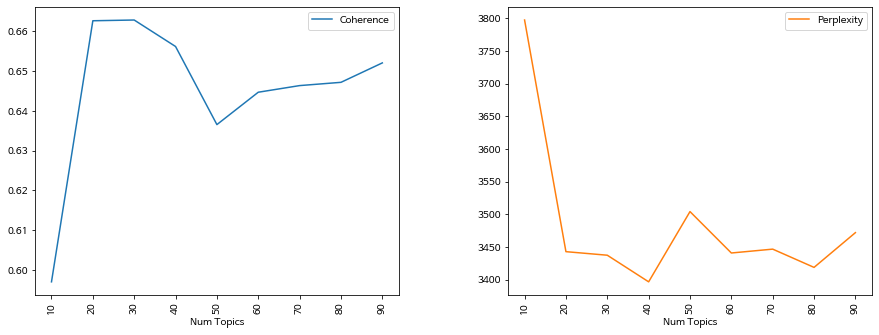

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2) # nrows=1 ? ncols=2?..2개 그림 배치를 어떻게?....행1개 열2개...subplots이 쪼개는 것....fig는 figsize에 관한 것....15.5가 아래 눈에 보이는 사이즈.....(가로..세로)

plt.subplots_adjust(left=0.125, #여백 간의 관계를 adjust.... 그림이 여려개 있을때 공간과 여백 설정....left=.125...반으로 쪼갠 것 내에서 배치를 어떻게...wspace는 두 그림 사이의 거리...hspace는 필요가 없다...
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5)

pd.pivot_table(mdl_check, values=["Perplexity", "Coherence"],index="Num Topics")\
    .plot(kind='line', rot=90, ax=ax, subplots=True)  # perplexity와 coherence의 위치? \표시는 .plot 과 연결. .plot을 어떻게 그릴거냐? 선 그래프...rotation 가로축 로테이션..위의 ax.
                                                      # subplots=True는 두개를 나눈다....
                                                      # \.plot??. 아래 상단에 나오는 array....는 뭐지? 없애도 되지 않나?

### 2-2. 경향 시각화
* coherence와 perplexity를 비교하였을 때, 40개의 토픽이 제일 적절하지만, 토픽의 수가 너무 많아 해석이 어려워질 것을 감안해 30개로 결정

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc43736fc10>,
      dtype=object)

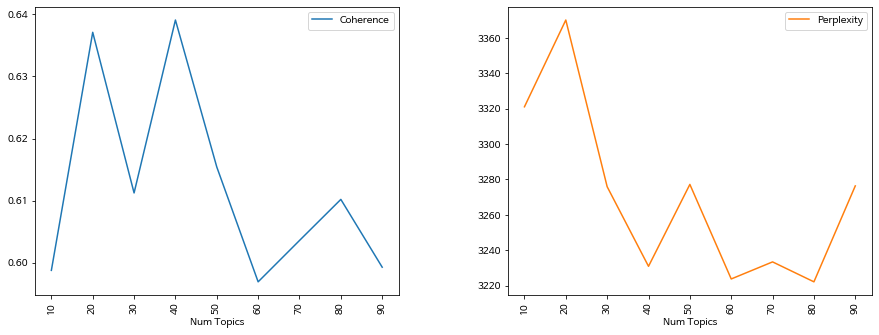

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2) # nrows=1 ? ncols=2?..2개 그림 배치를 어떻게?....행1개 열2개...subplots이 쪼개는 것....fig는 figsize에 관한 것....15.5가 아래 눈에 보이는 사이즈.....(가로..세로)

plt.subplots_adjust(left=0.125, #여백 간의 관계를 adjust.... 그림이 여려개 있을때 공간과 여백 설정....left=.125...반으로 쪼갠 것 내에서 배치를 어떻게...wspace는 두 그림 사이의 거리...hspace는 필요가 없다...
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5)

pd.pivot_table(mdl_check_k, values=["Perplexity", "Coherence"],index="Num Topics")\
    .plot(kind='line', rot=90, ax=ax, subplots=True)

### 2-3. 중앙 시각화
* coherence와 perplexity를 비교하였을 때, 40개의 토픽이 제일 적절하지만, 토픽의 수가 너무 많아 해석이 어려워질 것을 감안해 30개로 결정

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc437035810>,
      dtype=object)

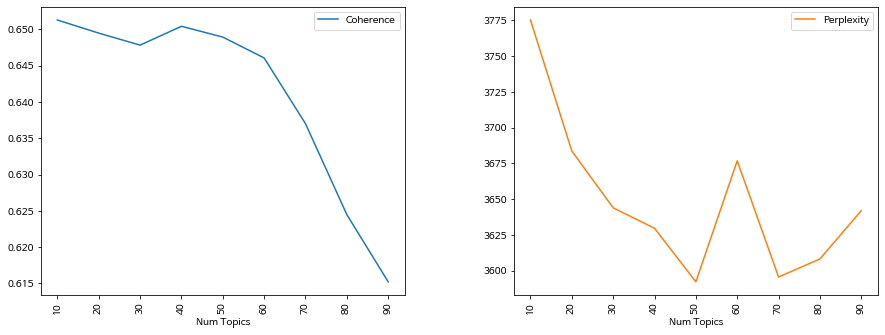

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2) # nrows=1 ? ncols=2?..2개 그림 배치를 어떻게?....행1개 열2개...subplots이 쪼개는 것....fig는 figsize에 관한 것....15.5가 아래 눈에 보이는 사이즈.....(가로..세로)

plt.subplots_adjust(left=0.125, #여백 간의 관계를 adjust.... 그림이 여려개 있을때 공간과 여백 설정....left=.125...반으로 쪼갠 것 내에서 배치를 어떻게...wspace는 두 그림 사이의 거리...hspace는 필요가 없다...
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5)

pd.pivot_table(mdl_check_j, values=["Perplexity", "Coherence"],index="Num Topics")\
    .plot(kind='line', rot=90, ax=ax, subplots=True)

## **3. 선택한 k에 대해 LDA 실행**
* 마찬가지로 교수님의 코드를 그대로 채용하였고, tp.LDAmodel의 반환값 이름만 조금씩 변경하여 실행하였습니다. (mdl, mdl_k(경향), mdl_j(중앙))
* 모델을 설정하고, 추후에 편하게 불러오기 위해 모델을 저장하는 작업을 각각 거치게 됩니다.

### 3-1. 전체 파일 pyLDAvis

In [ ]:
mdl = tp.LDAModel(k = 20, min_cf = 500, rm_top = 10)
# mdl = tp.HDPModel(initial_k=10)
for text in df['content']:  
    mdl.add_doc(Tokenizer(text))

for i in range(0, 100, 10):
    mdl.train(iter=10, workers=0)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))

Iteration: 0	Log-likelihood: -7.216921520906399
Iteration: 10	Log-likelihood: -6.8197084595454545
Iteration: 20	Log-likelihood: -6.73558365032882
Iteration: 30	Log-likelihood: -6.708707620971477
Iteration: 40	Log-likelihood: -6.692180423524576
Iteration: 50	Log-likelihood: -6.680787573774777
Iteration: 60	Log-likelihood: -6.674413493596232
Iteration: 70	Log-likelihood: -6.668075890268321
Iteration: 80	Log-likelihood: -6.664138052674097
Iteration: 90	Log-likelihood: -6.659795008409414
Top 10 words of topic #0
[('연금', 0.05850311741232872), ('보험료', 0.03430505469441414), ('기초', 0.03219020366668701), ('보험', 0.02645324170589447), ('국민', 0.02625460922718048), ('급여', 0.023240074515342712), ('기준', 0.021592596545815468), ('수급', 0.020961647853255272), ('제도', 0.02015543542802334), ('가입', 0.018484588712453842)]
Top 10 words of topic #1
[('활동', 0.042498406022787094), ('봉사', 0.030143750831484795), ('공헌', 0.023028148338198662), ('기부', 0.022951727733016014), ('재단', 0.01941939815878868), ('아동', 0.018307

In [ ]:
topic_term_dists = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
vocab = list(mdl.used_vocabs)
term_frequency = mdl.used_vocab_freq

In [ ]:
prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency,
    mds='mmds',
    sort_topics = False
)

In [ ]:
pyLDAvis.display(prepared_data)

In [ ]:
mdl.save('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/LDA_HW/lda_all.bin')

### 3-2. 경향 pyLDAvis

In [ ]:
mdl_k = tp.LDAModel(k = 30, min_cf = 500, rm_top = 10)
# mdl = tp.HDPModel(initial_k=10)
for text in df_k['content']:  
    mdl_k.add_doc(Tokenizer(text))

for i in range(0, 100, 10):
    mdl_k.train(iter=10, workers=0)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl_k.ll_per_word))

for k in range(mdl_k.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl_k.get_topic_words(k, top_n=10))

Iteration: 0	Log-likelihood: -6.632128558865068
Iteration: 10	Log-likelihood: -6.272936858263014
Iteration: 20	Log-likelihood: -6.167557391951504
Iteration: 30	Log-likelihood: -6.123336322118233
Iteration: 40	Log-likelihood: -6.104501271416661
Iteration: 50	Log-likelihood: -6.087637306313052
Iteration: 60	Log-likelihood: -6.078084930698304
Iteration: 70	Log-likelihood: -6.066489433245806
Iteration: 80	Log-likelihood: -6.058180936467309
Iteration: 90	Log-likelihood: -6.053000393373017
Top 10 words of topic #0
[('지역', 0.10092225670814514), ('주민', 0.08840484172105789), ('도시', 0.05464393272995949), ('마을', 0.047663066536188126), ('서울', 0.03376151621341705), ('아파트', 0.02942856401205063), ('사람', 0.028525864705443382), ('개발', 0.022086618468165398), ('행복', 0.02040158212184906), ('시민', 0.017573127523064613)]
Top 10 words of topic #1
[('정보', 0.06030271574854851), ('선발', 0.04980795830488205), ('채용', 0.04679716378450394), ('전형', 0.040689557790756226), ('공무원', 0.03527013584971428), ('올해', 0.02959264

In [ ]:
topic_term_dists_k = np.stack([mdl_k.get_topic_word_dist(k) for k in range(mdl_k.k)])
doc_topic_dists_k = np.stack([doc.get_topic_dist() for doc in mdl_k.docs])
doc_lengths_k = np.array([len(doc.words) for doc in mdl_k.docs])
vocab_k = list(mdl_k.used_vocabs)
term_frequency_k = mdl_k.used_vocab_freq

In [ ]:
prepared_data_k = pyLDAvis.prepare(
    topic_term_dists_k, 
    doc_topic_dists_k, 
    doc_lengths_k, 
    vocab_k, 
    term_frequency_k,
    mds='mmds',
    sort_topics = False
)

In [ ]:
pyLDAvis.display(prepared_data_k)

In [ ]:
mdl_k.save('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/LDA_HW/lda_k.bin')

### 3-3. 중앙 pyLDAvis

In [ ]:
mdl_j = tp.LDAModel(k = 30, min_cf = 500, rm_top = 10)
# mdl = tp.HDPModel(initial_k=10)
for text in df_j['content']:  
    mdl_j.add_doc(Tokenizer(text))

for i in range(0, 100, 10):
    mdl_j.train(iter=10, workers=0)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl_j.ll_per_word))

for k in range(mdl_j.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl_j.get_topic_words(k, top_n=10))

Iteration: 0	Log-likelihood: -6.787089140609413
Iteration: 10	Log-likelihood: -6.407361515910285
Iteration: 20	Log-likelihood: -6.310729184767885
Iteration: 30	Log-likelihood: -6.275009711768319
Iteration: 40	Log-likelihood: -6.257207522979586
Iteration: 50	Log-likelihood: -6.245508154416061
Iteration: 60	Log-likelihood: -6.238684929957755
Iteration: 70	Log-likelihood: -6.230960757145827
Iteration: 80	Log-likelihood: -6.22502333643236
Iteration: 90	Log-likelihood: -6.2175644098967755
Top 10 words of topic #0
[('증가', 0.04041403532028198), ('가구', 0.03664473071694374), ('분위', 0.03508599475026131), ('분기', 0.03171345964074135), ('조사', 0.029474548995494843), ('지난해', 0.027689088135957718), ('감소', 0.020603928714990616), ('가계', 0.020348861813545227), ('계층', 0.018308335915207863), ('결과', 0.01737309619784355)]
Top 10 words of topic #1
[('청년', 0.07084523886442184), ('일자리', 0.06504224985837936), ('예산', 0.05541897192597389), ('사업', 0.05193718150258064), ('노인', 0.04134673997759819), ('취업', 0.04023449

In [ ]:
topic_term_dists_j = np.stack([mdl_j.get_topic_word_dist(k) for k in range(mdl_j.k)])
doc_topic_dists_j = np.stack([doc.get_topic_dist() for doc in mdl_j.docs])
doc_lengths_j = np.array([len(doc.words) for doc in mdl_j.docs])
vocab_j = list(mdl_j.used_vocabs)
term_frequency_j = mdl_j.used_vocab_freq

In [ ]:
prepared_data_j = pyLDAvis.prepare(
    topic_term_dists_j, 
    doc_topic_dists_j, 
    doc_lengths_j, 
    vocab_j, 
    term_frequency_j,
    mds='mmds',
    sort_topics = False
)

In [ ]:
pyLDAvis.display(prepared_data_j)

In [ ]:
mdl_j.save('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/LDA_HW/lda_j.bin')

## **4. Optional - 저장한 모델 3개 불러오기**
* 매번 돌리는 것을 방지하고자 저장한 모델들을 다시 불러오는 작업입니다.

In [ ]:
# mdl = tp.LDAModel.load('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/LDA_HW/lda_all.bin')
# mdl_k = tp.LDAModel.load('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/LDA_HW/lda_k.bin')
# mdl_j = tp.LDAModel.load('/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/LDA_HW/lda_j.bin')

## **5(추가). 워드클라우드 실행**
* 레포트 작성에 워드클라우드를 통한 탐색적 분석 항목이 있어, 이 부분을 추가하였습니다.
* 저소득층이 대한민국 사회 문제와 밀접한 관계가 있어, 이미지는 대한민국 파일을 가져다가 사용하였습니다.

In [ ]:
from PIL import Image # 이미지+워드크라우드용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
import numpy as np

In [ ]:
Okt = Okt()
morphs = []

for sentence in df['content']:
    morphs.append(Okt.pos(sentence))

print(morphs[0])

[('화장실', 'Noun'), ('에', 'Josa'), ('들어갔다가', 'Verb'), ('나와', 'Verb'), ('남자', 'Noun'), ('화장실', 'Noun'), ('인지', 'Josa'), ('재차', 'Noun'), ('확인', 'Noun'), ('했다', 'Verb'), ('화장실', 'Noun'), ('안', 'Noun'), ('에', 'Josa'), ('무료', 'Noun'), ('생리대', 'Noun'), ('바구니', 'Noun'), ('가', 'Josa'), ('있어서', 'Adjective'), ('였다', 'Verb'), ('이번', 'Noun'), ('학기', 'Noun'), ('를', 'Josa'), ('시작', 'Noun'), ('하면서', 'Verb'), ('코넬대', 'Noun'), ('엔', 'Josa'), ('여성', 'Noun'), ('화장실', 'Noun'), ('은', 'Josa'), ('물론', 'Adverb'), ('남자', 'Noun'), ('화장실', 'Noun'), ('에도', 'Josa'), ('무료', 'Noun'), ('생리대', 'Noun'), ('가', 'Josa'), ('비치', 'Noun'), ('됐다', 'Verb'), ('성', 'Modifier'), ('정의', 'Noun'), ('옹호', 'Noun'), ('연합', 'Noun'), ('GJAC', 'Alpha'), ('이라는', 'Josa'), ('아이비리그', 'Noun'), ('학생', 'Noun'), ('단체', 'Noun'), ('가', 'Josa'), ('이', 'Noun'), ('운동', 'Noun'), ('을', 'Josa'), ('주관', 'Noun'), ('한다', 'Verb'), ('이', 'Noun'), ('들', 'Suffix'), ('은', 'Josa'), ('월경', 'Noun'), ('하는', 'Verb'), ('모든', 'Noun'), ('사람', 'Noun'), ('이', 'Josa'), ('꼭',

In [ ]:
noun_list=[] 
for sentence in morphs: 
    for word, tag in sentence: 
        if tag in ['Noun'] and ('이' not in word) and ('것' not in word) and ('명' not in word) and ('등' not in word) and ('수' not in word) and ('전' not in word) and ('그' not in word) and ('왜' not in word) and ('기사' not in word): 
            noun_list.append(word)

noun_list[:10]

['화장실', '남자', '화장실', '재차', '확인', '화장실', '안', '무료', '생리대', '바구니']

In [ ]:
count = Counter(noun_list)

print(count)

words = dict(count.most_common(100))

print(words)

Counter({'소득': 40067, '층': 20477, '지원': 19160, '말': 17844, '사회': 17136, '정부': 16780, '위': 13732, '사업': 11693, '지역': 10882, '위해': 10720, '정책': 9903, '가구': 9902, '한국': 9811, '중': 9808, '고': 9666, '복지': 9479, '더': 9332, '경제': 8662, '주택': 8391, '대한': 8281, '때': 8123, '교육': 7979, '개': 7943, '때문': 7812, '비': 7755, '지난해': 7631, '문제': 7612, '대상': 7475, '기업': 7447, '사람': 7326, '로': 7253, '학생': 7116, '를': 7091, '세': 7014, '올해': 7000, '국민': 6984, '통해': 6858, '경우': 6823, '지난': 6788, '확대': 6483, '부담': 6340, '서울': 6285, '계층': 6224, '예산': 5866, '대출': 5858, '의료': 5770, '의': 5764, '기준': 5756, '미국': 5686, '활동': 5645, '학교': 5642, '일자리': 5576, '안': 5572, '금융': 5476, '증가': 5475, '대통령': 5444, '센터': 5272, '건강': 5207, '우리': 5197, '연금': 5167, '보험': 5166, '제도': 5123, '일': 5101, '또': 5056, '및': 5052, '가장': 5040, '계획': 4974, '곳': 4939, '운영': 4925, '지급': 4826, '달': 4815, '점': 4793, '현재': 4647, '성장': 4627, '대표': 4624, '인상': 4622, '내': 4560, '대해': 4559, '제': 4523, '시작': 4521, '월': 4515, '노인': 4438, '관련': 4436, '생활':

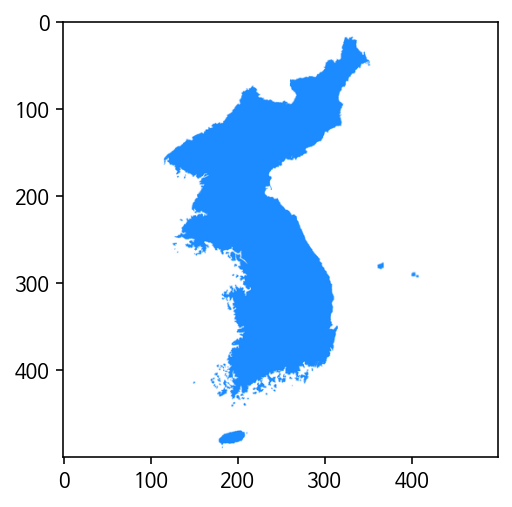

In [ ]:
mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/소셜빅데이터분석/LDA_HW/korea_image.png"))
plt.imshow(mask)

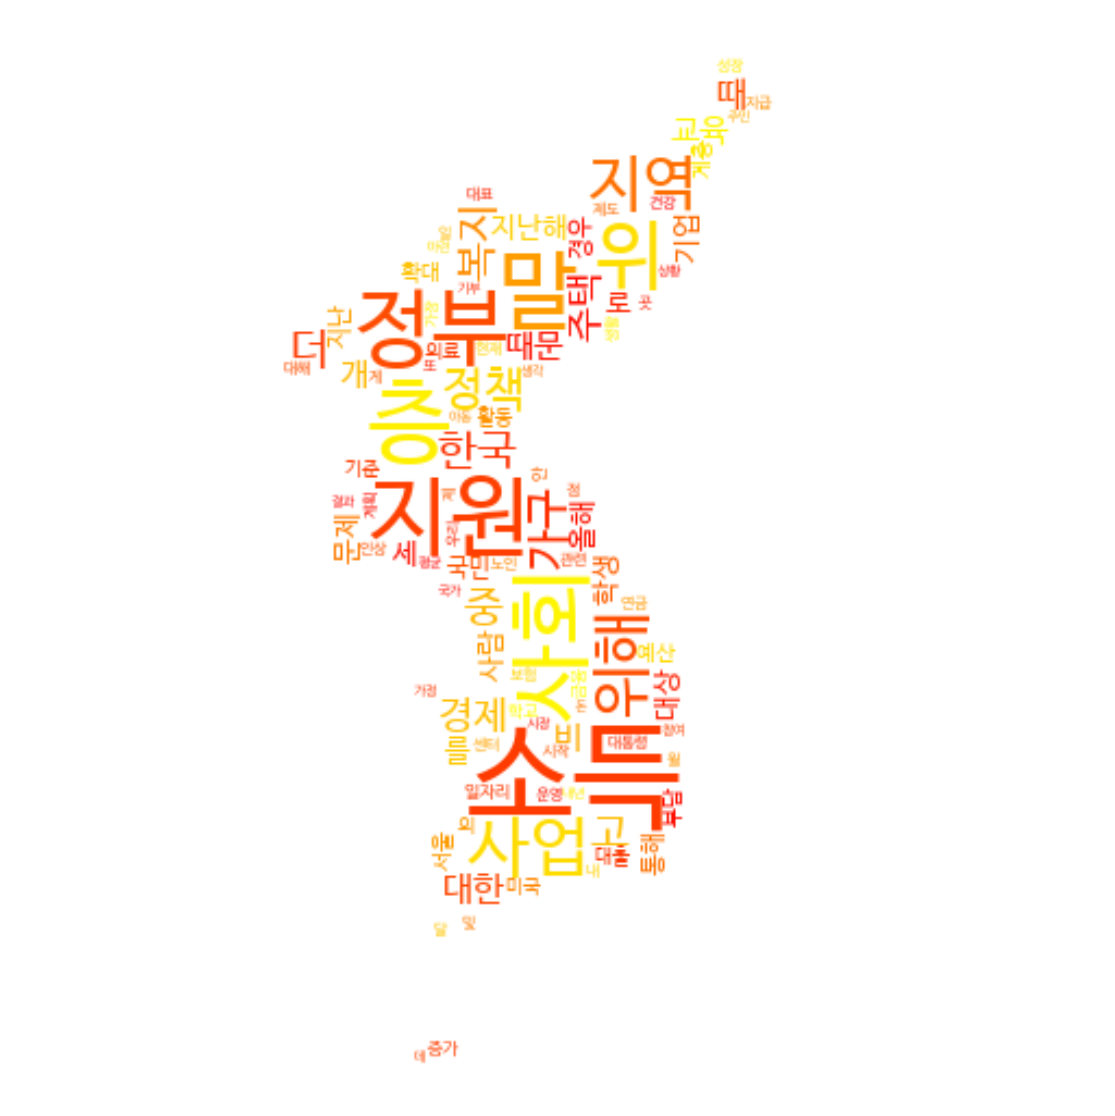

In [ ]:
wordcloud = WordCloud(font_path = fontpath, 
                      mask=mask,
                      background_color='white',
                      max_words=100,
                      max_font_size=100,
                      height=mask.shape[0],
                      width=mask.shape[1],
                      #colormap = 'Accent_r').generate_from_frequencies(words)
                      colormap = "autumn").generate_from_frequencies(words)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **6. Optional - Topic별 단어, 기사 개수, 본문 등 정보 확인**
* Labeling을 하기 위해 Topic의 num을 바꿔가면서 어떤 기사가 들어가 있는지 확인했습니다.

In [ ]:
pprint.pprint(mdl.get_topic_words(17, top_n=10))

[('사람', 0.04083523154258728),
 ('아이', 0.03738357126712799),
 ('시간', 0.019184937700629234),
 ('시작', 0.01429986022412777),
 ('자신', 0.013898503966629505),
 ('서울', 0.011490367352962494),
 ('사진', 0.011444497853517532),
 ('한국', 0.011318357661366463),
 ('대표', 0.009896409697830677),
 ('가족', 0.009368913248181343)]


In [ ]:
top_docs = [[] for _ in range(mdl.k)]

for doc in mdl.docs:
    top_docs[doc.get_topics(top_n=1)[0][0]].append(doc)

In [ ]:
for k in range(mdl.k):
    print('Num docs belonging to topic #%d: %d' % (k, len(top_docs[k])))

Num docs belonging to topic #0: 543
Num docs belonging to topic #1: 1549
Num docs belonging to topic #2: 307
Num docs belonging to topic #3: 223
Num docs belonging to topic #4: 510
Num docs belonging to topic #5: 398
Num docs belonging to topic #6: 316
Num docs belonging to topic #7: 680
Num docs belonging to topic #8: 423
Num docs belonging to topic #9: 457
Num docs belonging to topic #10: 775
Num docs belonging to topic #11: 395
Num docs belonging to topic #12: 642
Num docs belonging to topic #13: 614
Num docs belonging to topic #14: 377
Num docs belonging to topic #15: 577
Num docs belonging to topic #16: 459
Num docs belonging to topic #17: 551
Num docs belonging to topic #18: 679
Num docs belonging to topic #19: 414


In [ ]:
top_docs[17][0:19]

[<tomotopy.Document with words="신문 기사 뉴스 단신 라디오 프로그램 고층 아파트 대부분 사람 관심 휘발 진열창 안전 거리 원주민 사파리 모두 만다 영국 런던 아파트 그렌펠 타워 화재 발생 시작 건물 인화 내장재 순식간 건물 전체 주민 새벽 시간 참사 대피 진입로 화재 진압 시간 임대 아파트 이주민 저소득층 주민 거주 사람 화재 미디어 관심 청문회 교사 백서 화재 이전 그렌펠 타워 주민 블로그 방법 화재 위험 이야기 문제 주목 작가 대런 맥가비 가난 사파리 가난 미디어 사람 태도 구경 비판 임대 아파트 논란 공간 가난 시선 임대 아파트 다큐멘터리 제목 도시 엄마 아이 엄마 임대 아파트 아이 주민 가슴 도시 가운데 제목 상황 휴거 임대 아파트 거주자 가난 아이 반응 의도 차별 혐오 의도 은연중 침식 인식 콘텐츠 과정 자문 소식 보도 속성 핑계 구경 시선 의도 오지 공간 가난 시선 사당동 철거 가족 지금 기록 사회 학자 교수 작업 서울 독립 영화제 최우수 작품상 사당동 더하기 교수 금선 할머니 내용 가족 공간 철거 임대 아파트 변화 가난 영화 변화 사당동 더하기 자막 가족 생존 의지 강인 경계 가난 무게 가족 이야기 천착 이야기 가족 이야기 울림 감독 인터뷰 다큐멘터리 이야기 응시 관찰 개념 의미 가족 고민 고민 일상 안정 시간 공간 고민">,
 <tomotopy.Document with words="닥터 바이든 미국 대통령 당선자 바이든 부인 트위터 자신 평생 교육자 소개 하필 단어 선택 바이든 여성 경력 단절 경험 이혼 경력 아내 교통사고 아들 바이든 결혼 결혼 교사 생활 계속 동안 웨스트 체스터 주립 대학 교육 분야 석사 학위 전일제 공부 학기 과목 수강 얼마 육아 직장 전업주부 기간 병원 장기 입원 아동 교사 복귀 석사 전공 지식 활용 정서장애 아이 역사 동안 영문학 석사 학위 학위 인생 경로 열쇠 커뮤니티 칼리지 일터 영작 글쓰기 커뮤니티 칼리지 학생 대학생 저소득층 이민자 경력 단절 여성 애정 바이든 사람 마음 편안 여성 학교 

### 6-1(추가). 토픽별 10년간 전체 기사 개수 추가
* 보고서에 참고자료로 사용하기 위해 간단하게 만들었습니다.

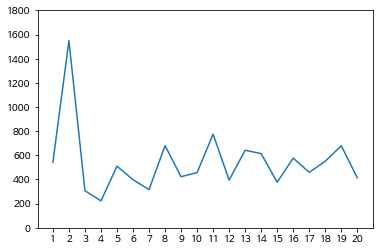

In [ ]:
topics = list(range(1, 21))
news_num = []

for i in range(20):
    news_num.append(len(top_docs[i]))

plt.ylim(0, 1800)
plt.xticks(list(range(1,21)))
plt.plot(topics, news_num)

## **7. 년도별 - 신문사별 평균 토픽 확률값 계산**
* 교수님의 코드를 그대로 채용하였고, 전체 신문사에서 20개의 토픽으로 나눴으므로 그에 맞게 코드를 조금 수정하였습니다.

In [ ]:
topic_term_dists = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
vocab = list(mdl.used_vocabs) 
term_frequency = mdl.used_vocab_freq

In [ ]:
df_lda = df.reset_index() 

In [ ]:
df_topic = pd.DataFrame.from_records(doc_topic_dists)
df_topic.columns = ['Topic 01', 'Topic 02', 'Topic 03', 'Topic 04', 'Topic 05', 'Topic 06', 'Topic 07', 'Topic 08', 'Topic 09', 'Topic 10', 
                    'Topic 11', 'Topic 12', 'Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19', 'Topic 20']
df_topic.head()

,Topic 01,Topic 02,Topic 03,Topic 04,Topic 05,Topic 06,Topic 07,Topic 08,Topic 09,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
0,0.000748,0.103774,0.000390,0.000309,0.051896,0.113380,0.000374,0.000694,0.585777,0.000500,0.032027,0.000945,0.000654,0.011473,0.000540,0.000817,0.000597,0.001028,0.001122,0.092957
1,0.300639,0.000210,0.045147,0.000056,0.000107,0.050800,0.000068,0.000127,0.007661,0.018873,0.135453,0.028345,0.109052,0.135448,0.127812,0.017053,0.020769,0.002066,0.000205,0.000109
2,0.000698,0.001071,0.000364,0.000288,0.000544,0.000459,0.000349,0.240016,0.067781,0.000466,0.001156,0.000882,0.000610,0.001129,0.010078,0.000762,0.000557,0.671189,0.001047,0.000554
3,0.000542,0.000832,0.000283,0.000224,0.342578,0.000356,0.000271,0.082323,0.000589,0.000362,0.038089,0.208954,0.000474,0.149641,0.000391,0.000592,0.000432,0.000745,0.164453,0.007869
4,0.005352,0.180161,0.000190,0.000150,0.000283,0.000239,0.000182,0.000338,0.065252,0.000243,0.165239,0.000460,0.000318,0.579310,0.000262,0.000397,0.000290,0.000500,0.000546,0.000289


In [ ]:
df_lda = pd.concat([df_lda, df_topic], axis=1) 
test = df_lda.drop(['month', 'day', 'content', 'index'], axis = 1) 

### 7-1. 전체 파일에서 선택한 10개 토픽에 대한 시각화
* 그대로 bar 형태로 출력하였고, 그림의 크기를 조금 키웠습니다.
* 또한 각 차트마다 y값을 다르게 출력하였습니다. 정확한 수치를 보는게 더 좋다고 생각해서입니다.

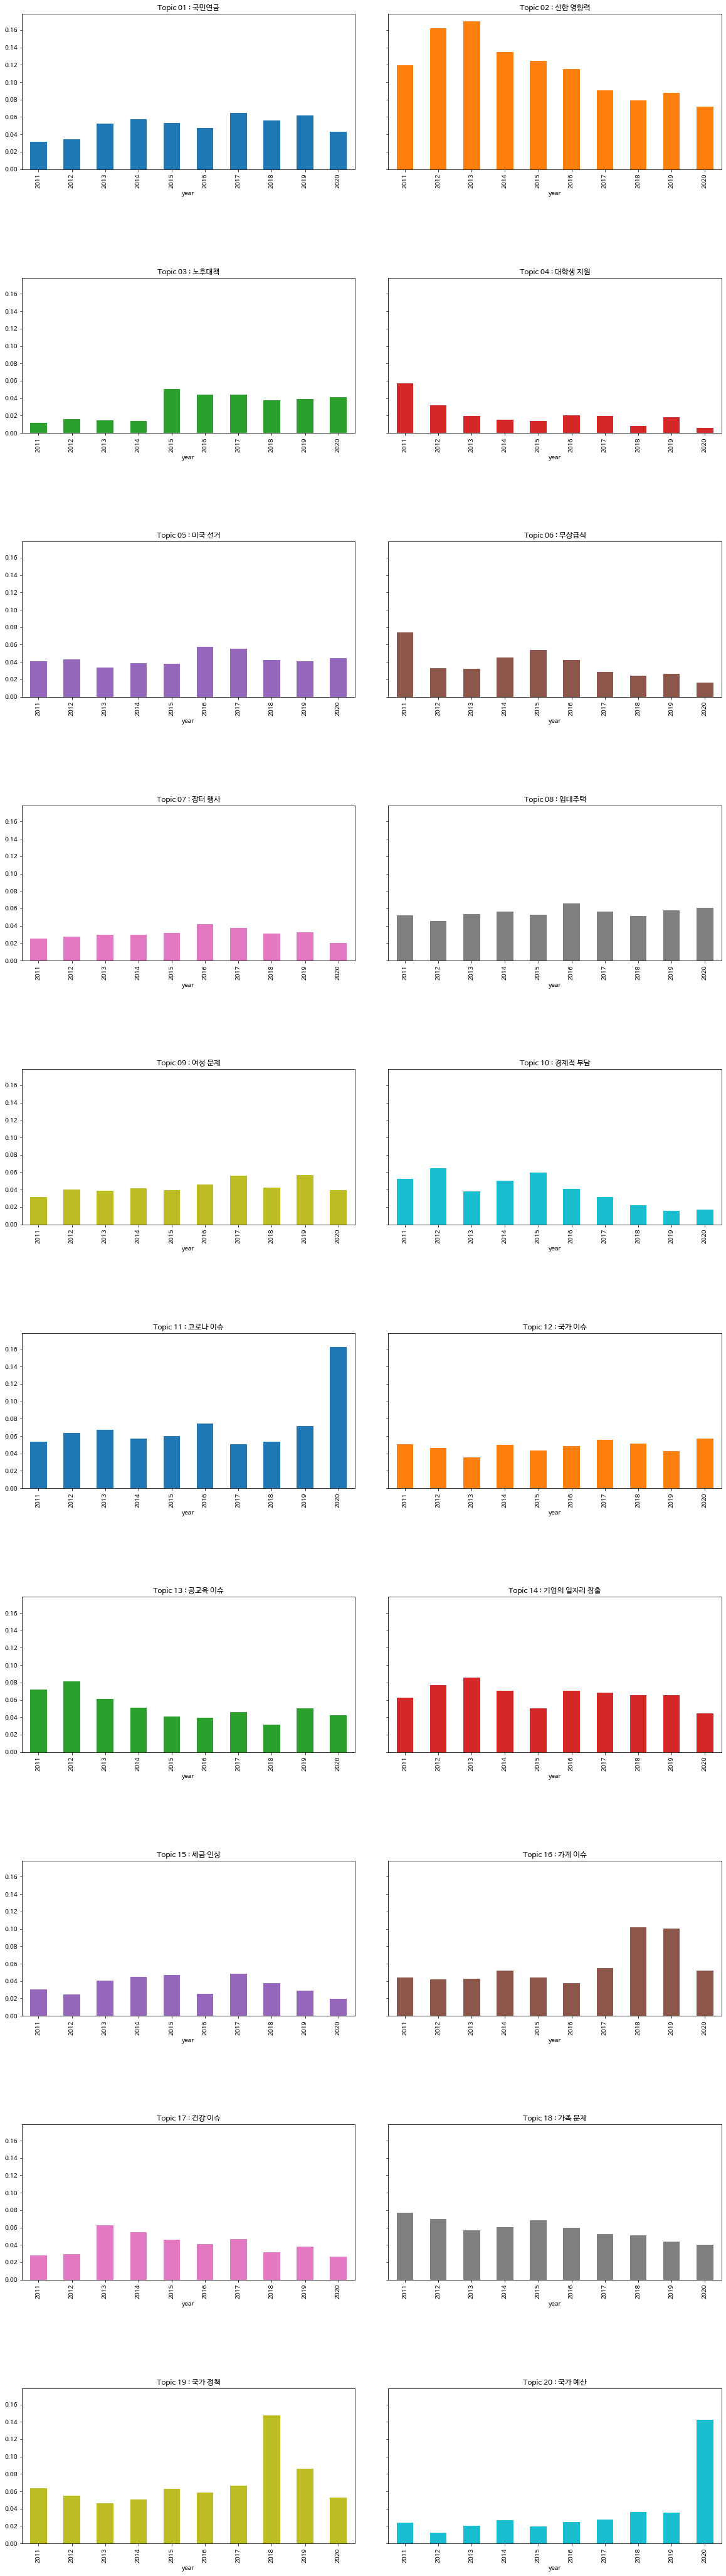

In [ ]:
fig, ax = plt.subplots(figsize=(20,70), nrows=10, ncols=2, sharey = 'all')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.7)


pd.pivot_table(test, values=["Topic 01", "Topic 02", "Topic 03", "Topic 04","Topic 05", "Topic 06", "Topic 07", "Topic 08", "Topic 09", "Topic 10",
                             "Topic 11", "Topic 12", "Topic 13", "Topic 14","Topic 15", "Topic 16", "Topic 17", "Topic 18", "Topic 19", "Topic 20"],
               index="year", aggfunc="mean")\
               .plot(kind='bar', rot=90, ax=ax, subplots=True, legend=None) 

ax[0, 0].set_title('Topic 01 : 국민연금')
ax[0, 1].set_title('Topic 02 : 선한 영향력')
ax[1, 0].set_title('Topic 03 : 노후대책')
ax[1, 1].set_title('Topic 04 : 대학생 지원')
ax[2, 0].set_title('Topic 05 : 미국 선거')
ax[2, 1].set_title('Topic 06 : 무상급식')
ax[3, 0].set_title('Topic 07 : 장터 행사')
ax[3, 1].set_title('Topic 08 : 임대주택')
ax[4, 0].set_title('Topic 09 : 여성 문제')
ax[4, 1].set_title('Topic 10 : 경제적 부담')
ax[5, 0].set_title('Topic 11 : 코로나 이슈')
ax[5, 1].set_title('Topic 12 : 국가 이슈')
ax[6, 0].set_title('Topic 13 : 공교육 이슈')
ax[6, 1].set_title('Topic 14 : 기업의 일자리 창출')
ax[7, 0].set_title('Topic 15 : 세금 인상')
ax[7, 1].set_title('Topic 16 : 가계 이슈')
ax[8, 0].set_title('Topic 17 : 건강 이슈')
ax[8, 1].set_title('Topic 18 : 가족 문제')
ax[9, 0].set_title('Topic 19 : 국가 정책')
ax[9, 1].set_title('Topic 20 : 국가 예산')


plt.show()

### 7-2. 선택한 10개의 토픽에 대해 신문사별 변화 시각화
* stacked bar의 형태로는 해석이 조금 불편하다고 생각하여, line 형태로 출력하였습니다.
* 첫 그래프의 ylim을 0에서 40으로 조정하여 좀더 직관적으로 해석이 가능하도록 하였습니다.

In [ ]:
test_mean = test.groupby(['year','news']).sum()
test_mean['Mean'] = test_mean.mean(axis=1)
test_mean.head()

Topic 01    Topic 02  Topic 03  ...   Topic 19   Topic 20   Mean
year news                                   ...                             
2011 경향    20.140762   68.746278  6.485500  ...  42.698425  16.508333  30.10
     중앙    14.171363   61.991056  5.883385  ...  26.892989   9.781390  24.75
2012 경향    16.722689   77.184723  7.167517  ...  34.401167   6.580225  26.15
     중앙    18.612610   90.622672  9.329469  ...  22.665101   5.936312  25.70
2013 경향    31.618488  109.767962  8.271133  ...  31.149791  12.837907  31.70

[5 rows x 21 columns]

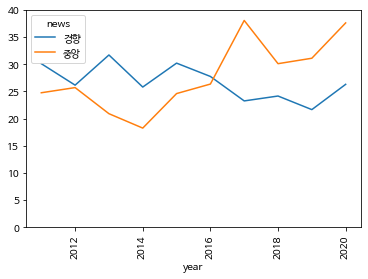

In [ ]:
topic_group = test_mean.groupby(['year','news']).mean()['Mean']\
    .unstack('news')\
    .plot(rot = 90)

plt.ylim([0,40])
plt.show()

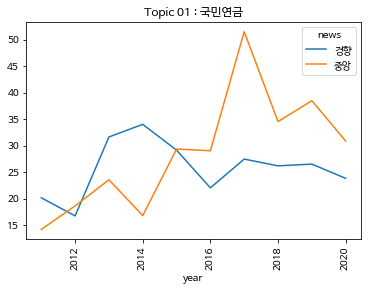

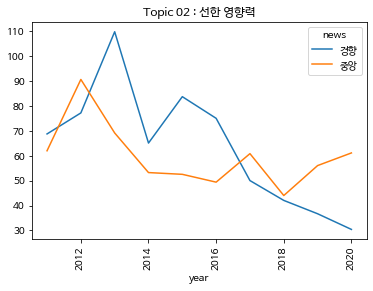

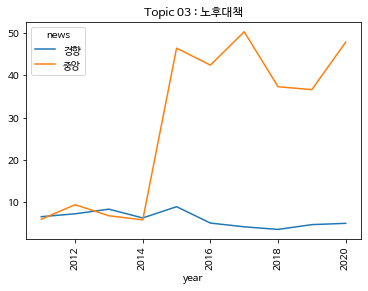

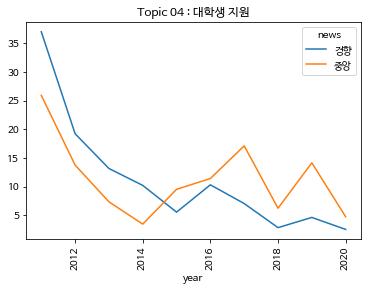

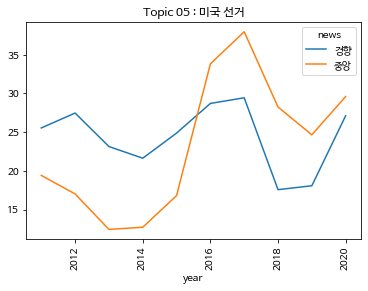

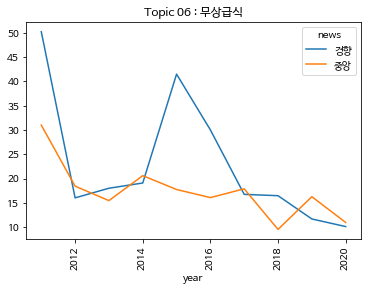

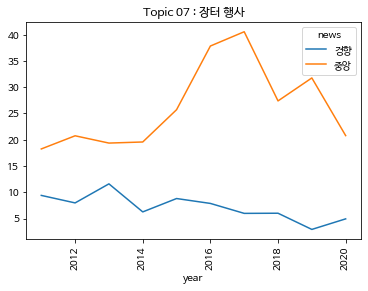

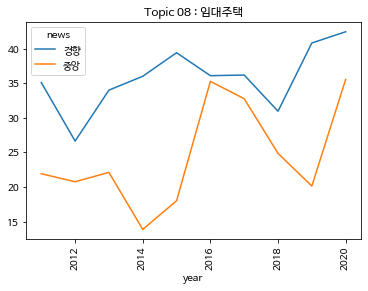

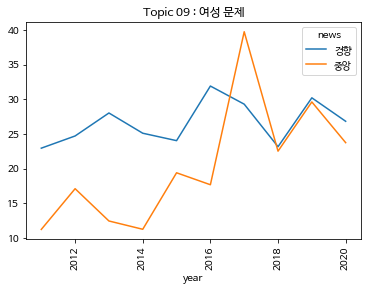

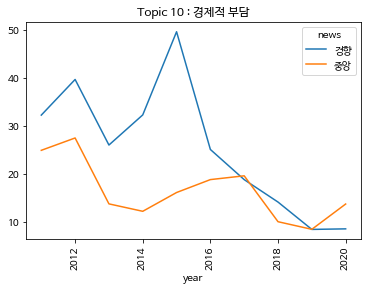

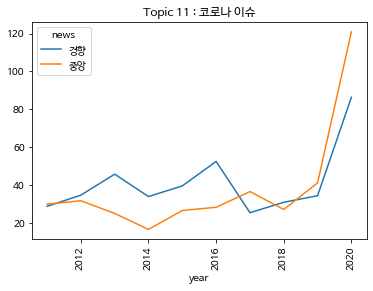

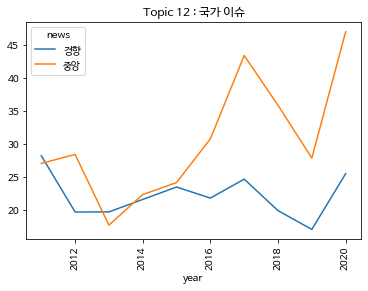

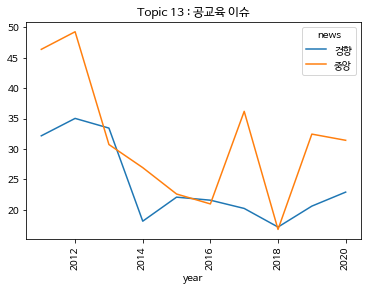

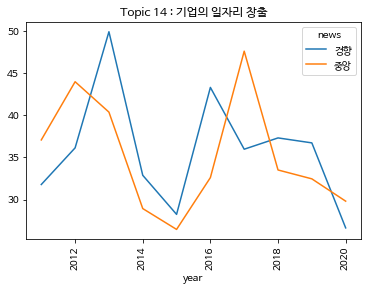

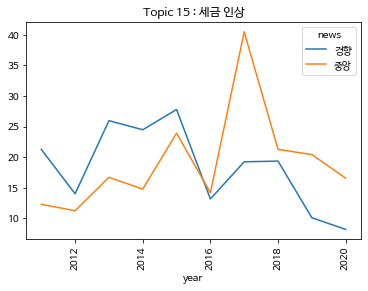

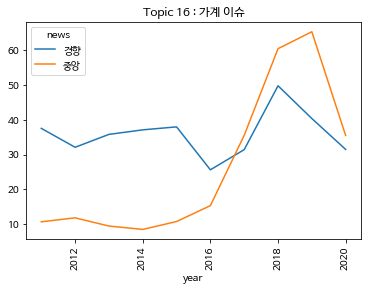

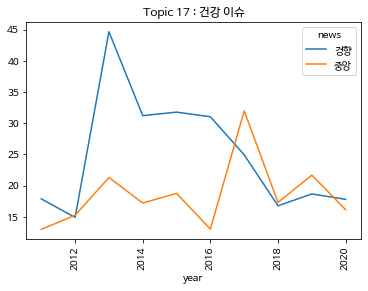

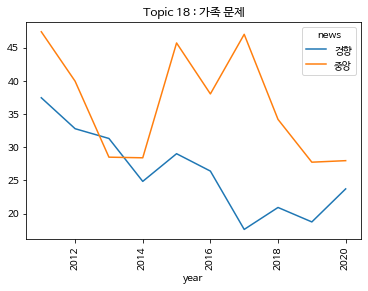

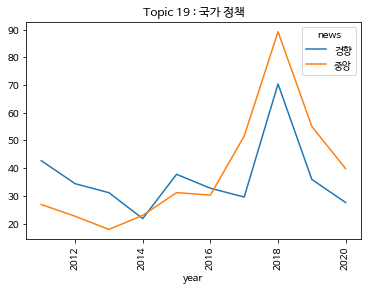

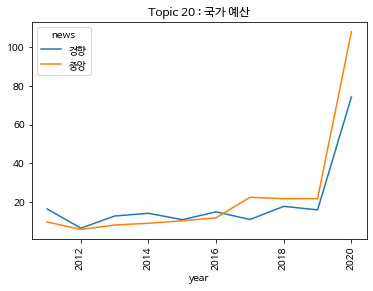

In [ ]:
topic = ['Topic 01', 'Topic 02', 'Topic 03', 'Topic 04', 'Topic 05', 'Topic 06', 'Topic 07', 'Topic 08', 'Topic 09', 'Topic 10', 
        'Topic 11', 'Topic 12', 'Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19', 'Topic 20']


topic_title = ['Topic 01 : 국민연금',
               'Topic 02 : 선한 영향력',
               'Topic 03 : 노후대책',
               'Topic 04 : 대학생 지원',
               'Topic 05 : 미국 선거',
               'Topic 06 : 무상급식',
               'Topic 07 : 장터 행사',
               'Topic 08 : 임대주택',
               'Topic 09 : 여성 문제',
               'Topic 10 : 경제적 부담',
               'Topic 11 : 코로나 이슈',
               'Topic 12 : 국가 이슈',
               'Topic 13 : 공교육 이슈',
               'Topic 14 : 기업의 일자리 창출',
               'Topic 15 : 세금 인상',
               'Topic 16 : 가계 이슈',
               'Topic 17 : 건강 이슈',
               'Topic 18 : 가족 문제',
               'Topic 19 : 국가 정책',
               'Topic 20 : 국가 예산']

for i in zip(topic, topic_title):
    test_mean.groupby(['year', 'news']).sum()[i[0]].unstack(level='news').plot(rot = 90, title=(i[1]))


# for i in topic:
#     test_mean.groupby(['year', 'news']).sum()[i].unstack(level='news').plot(rot=90, title=(i))